In [3]:
import pandas as pd

# What factors were the most useful in predicting wage?

In [4]:
# Classifying the wage variable, if wage is above the median value is 1, otherwise 0
# Read the file into a dataframe
df = pd.read_csv('wage_data.txt', sep=r'\s+')

# Calculate the median wage
median_wage = df['wage'].median()

# Classify the wage variable
df['wage_class'] = df['wage'].apply(lambda x: 1 if x > median_wage else 0)
df.head()


,education,south,sex,experience,union,wage,age,race,occupation,sector,marr,wage_class
0,8,0,1,21,0,5.10,35,2,6,1,1,0
1,9,0,1,42,0,4.95,57,3,6,1,1,0
2,12,0,0,1,0,6.67,19,3,6,1,0,0
3,12,0,0,4,0,4.00,22,3,6,0,0,0
4,12,0,0,17,0,7.50,35,3,6,0,1,0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('wage_class', axis=1), df['wage_class'], test_size=0.2, random_state=42)

# Create an instance of the logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


c:\Users\Cameron\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


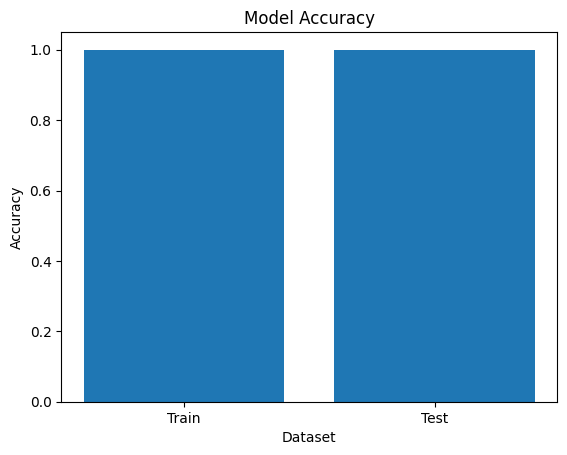

In [6]:
import matplotlib.pyplot as plt

# Create a bar plot of the accuracy
plt.bar(['Train', 'Test'], [accuracy, accuracy])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()


In [7]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the random forest classifier
rf_model = RandomForestClassifier()

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
rf_y_pred = rf_model.predict(X_test)

# Calculate the accuracy of the model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 1.0
